In [1]:
import numpy as np
import pandas as pd
import pathlib as pl
from datetime import datetime
import matplotlib.pyplot as plot
from pandas import DataFrame, Series

In [2]:
# read from csv files

datapath=pl.Path("../csvdata")

file_list=[]
dfs=[]
for x in datapath.glob("*[0-9].csv"):
    print("Reading "+x.name)
    f=pd.read_csv(x,index_col=0,na_values=" ")
    dfs.append(f)
    file_list.append(x.name)

Reading kVKunYang3.csv
Reading kVWanKe1.csv
Reading kVChangLiu3.csv
Reading kVJiangChuan1.csv
Reading kVChangLiu2.csv
Reading kVQinZhou4.csv
Reading kVChangLiu1.csv
Reading kVJiangChuan4.csv
Reading kVJiangChuan5.csv
Reading kVQinZhou3.csv
Reading kVKunYang1.csv
Reading kVJiangChuan3.csv
Reading kVJiangChuan2.csv
Reading kVChangLiu4.csv
Reading kVWanKe2.csv


In [3]:
cols = ["Avg[V 有效值 AB]",
# "Avg[V 总谐波畸变率 A]",
 "Avg[V 负序不平衡 Total]",
 "Avg[V SPOS All]",
 "Avg[V SNEG All]",
 "Avg[V SZERO All]",
#"Pst A",
 "Avg[I 有效值 A]",
 "Avg[I 总谐波畸变率 A]",
 "Avg[I 负序不平衡 Total]",
 "Avg[I SPOS All]",
 "Avg[I SNEG All]",
 "Avg[I ZERO All]",
# "Avg[P A]",
# "Avg[Q A]",
# "Avg[S A]",
# "Avg[功率因数 A]"
 ]

In [8]:
tr_data=DataFrame()
i=0
for df in dfs:
    for c in df.columns:
        if c.find("Avg[I SNEG All]")!=-1:
            print (c)
            tr_data[c]=df[c]
            i+=1
print(i)

 KunYang3 - Avg[I SNEG All] (A)
 WanKe1 - Avg[I SNEG All] (A)
 Changliu3 - Avg[I SNEG All] (A)
 JiangChuan1 - Avg[I SNEG All] (A)
 Changliu2 - Avg[I SNEG All] (A)
 QinZhou4 - Avg[I SNEG All] (A)
 Changliu1 - Avg[I SNEG All] (A)
 JiangChuan4 - Avg[I SNEG All] (A)
 JiangChuan5 - Avg[I SNEG All] (A)
 QinZhou3 - Avg[I SNEG All] (A)
 KunYang1 - Avg[I SNEG All] (A)
 JiangChuan3 - Avg[I SNEG All] (A)
 JiangChuan2 - Avg[I SNEG All] (A)
 Changliu4 - Avg[I SNEG All] (A)
 WanKe2 - Avg[I SNEG All] (A)
15


In [9]:
train_data=tr_data.dropna()

In [10]:
len(train_data)

3299

In [11]:
train_data=train_data.dropna(axis=1)

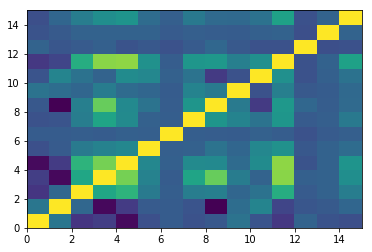

In [12]:
corMat=DataFrame(train_data.corr())
plot.pcolor(corMat)
plot.show()

In [14]:
train_data.describe()

,KunYang3 - Avg[I SNEG All] (A),WanKe1 - Avg[I SNEG All] (A),Changliu3 - Avg[I SNEG All] (A),JiangChuan1 - Avg[I SNEG All] (A),Changliu2 - Avg[I SNEG All] (A),QinZhou4 - Avg[I SNEG All] (A),Changliu1 - Avg[I SNEG All] (A),JiangChuan4 - Avg[I SNEG All] (A),JiangChuan5 - Avg[I SNEG All] (A),QinZhou3 - Avg[I SNEG All] (A),KunYang1 - Avg[I SNEG All] (A),JiangChuan3 - Avg[I SNEG All] (A),JiangChuan2 - Avg[I SNEG All] (A),Changliu4 - Avg[I SNEG All] (A),WanKe2 - Avg[I SNEG All] (A)
count,3299.000000,3299.000000,3299.000000,3299.000000,3299.000000,3299.000000,3299.000000,3299.000000,3299.000000,3299.000000,3299.000000,3299.000000,3299.000000,3299.000000,3299.000000
mean,0.181874,3.209161,0.313109,59.482901,0.363804,0.254570,0.017382,1.357104,1.162232,0.459858,1.871811,24.798242,0.013269,0.017314,1.711763
std,0.043728,1.371642,0.037432,9.167845,0.060451,0.089117,0.000281,0.438684,0.430088,0.146774,0.288465,4.098448,0.002856,0.000251,0.877790
min,0.039332,0.345390,0.177255,44.910065,0.167544,0.050382,0.016453,0.439033,0.169844,0.068401,0.726187,17.344202,0.007315,0.016497,0.322399
25%,0.153981,2.283381,0.286881,51.213820,0.327683,0.187074,0.017186,0.986805,0.808630,0.350486,1.678272,21.380312,0.010612,0.017139,1.035112
50%,0.186578,3.079269,0.313668,59.216892,0.369856,0.250477,0.017390,1.383880,1.077739,0.462781,1.887582,25.301262,0.013360,0.017317,1.574165
75%,0.210149,3.936870,0.339114,67.653721,0.407095,0.312364,0.017579,1.667473,1.534881,0.559315,2.069611,27.930292,0.015959,0.017488,2.202981
max,0.439548,8.805830,0.430168,81.480103,0.525946,0.718374,0.018224,2.949863,2.351747,0.968845,2.665280,36.302013,0.018710,0.018262,6.857071


In [15]:
from sklearn.model_selection import train_test_split
train,test= train_test_split(train_data,test_size=0.2,random_state=0)

In [16]:
MAX= train.max()
MIN = train.min()

In [17]:
train_s=(train-MIN)/(MAX-MIN)
test_s=(test-MIN)/(MAX-MIN)

In [18]:
train_s=train_s.fillna(0)
test_s=test_s.fillna(0)

In [19]:
#  generate X_train,Y_train,X_test,Y_test for all target features
X_train=train_s.copy();Y_train=DataFrame()

for c in train_s.columns:
    if c.find("WanKe1") !=-1 :
        Y_train[c]=train_s[c]
        X_train=X_train.drop(c,axis=1)

        
X_test=test_s.copy();Y_test=DataFrame()

for c in test_s.columns:
    if c.find("WanKe1") !=-1 :
        Y_test[c]=test_s[c]
        X_test=X_test.drop(c,axis=1)

In [20]:
###### network from keras for SHDKY data simulation ###########
from keras.models import Sequential
from keras.layers import Dense, Activation,Input
import keras


model = Sequential()

model.add(Dense(28, input_dim=14,kernel_initializer="normal"))
model.add(Activation('relu'))
model.add(Dense(7, activation='relu',kernel_initializer="normal"))
model.add(Dense(1, activation='linear',kernel_initializer="normal"))

/home/techstar/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [38]:
model.compile(loss='mean_squared_error', 
              optimizer=keras.optimizers.SGD(lr=0.02))

In [84]:
model.fit(X_train, Y_train, epochs=20,batch_size=30,
          shuffle=True,verbose=2,validation_split=0.2) 

Train on 2111 samples, validate on 528 samples
Epoch 1/20
 - 0s - loss: 0.0088 - val_loss: 0.0114
Epoch 2/20
 - 0s - loss: 0.0088 - val_loss: 0.0113
Epoch 3/20
 - 0s - loss: 0.0088 - val_loss: 0.0111
Epoch 4/20
 - 0s - loss: 0.0088 - val_loss: 0.0111
Epoch 5/20
 - 0s - loss: 0.0087 - val_loss: 0.0110
Epoch 6/20
 - 0s - loss: 0.0088 - val_loss: 0.0116
Epoch 7/20
 - 0s - loss: 0.0088 - val_loss: 0.0120
Epoch 8/20
 - 0s - loss: 0.0087 - val_loss: 0.0114
Epoch 9/20
 - 0s - loss: 0.0087 - val_loss: 0.0115
Epoch 10/20
 - 0s - loss: 0.0088 - val_loss: 0.0111
Epoch 11/20
 - 0s - loss: 0.0088 - val_loss: 0.0110
Epoch 12/20
 - 0s - loss: 0.0087 - val_loss: 0.0114
Epoch 13/20
 - 0s - loss: 0.0088 - val_loss: 0.0115
Epoch 14/20
 - 0s - loss: 0.0087 - val_loss: 0.0110
Epoch 15/20
 - 0s - loss: 0.0088 - val_loss: 0.0127
Epoch 16/20
 - 0s - loss: 0.0088 - val_loss: 0.0113
Epoch 17/20
 - 0s - loss: 0.0087 - val_loss: 0.0114
Epoch 18/20
 - 0s - loss: 0.0088 - val_loss: 0.0117
Epoch 19/20
 - 0s - loss: 

In [86]:
#((model.predict(X_test)-Y_test)/Y_test)

In [85]:
((model.predict(X_test)-Y_test)).describe()

,WanKe1 - Avg[I SNEG All] (A)
count,660.000000
mean,0.000050
std,0.106471
min,-0.398747
25%,-0.063252
50%,0.004520
75%,0.063650
max,0.372294


In [87]:
c=Y_test.columns
R= pd.DataFrame(model.predict(X_test),columns=['V_pred'])
R.index = Y_test.index
R= R.join(Y_test)
R=  R*(MAX[c]-MIN[c]).values[0]+MIN[c].values[0]


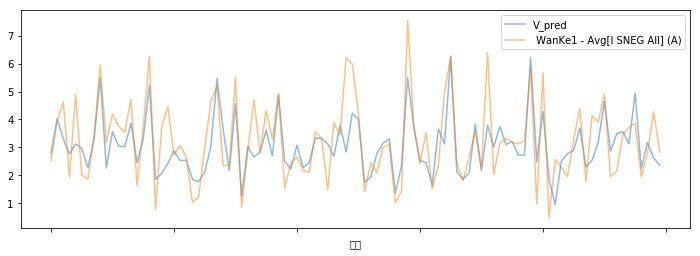

In [88]:
R_show=R.iloc[200:300,:]

import pylab
pylab.rcParams['figure.figsize'] = (12.0, 4.0)

R_show.plot(alpha =0.5,figsize = (12,4))

In [89]:
R["diff"]=(R["V_pred"]-R[c[0]])
R["diff_ptg"]=(R["V_pred"]-R[c[0]])/R[c[0]]

In [92]:
(R.diff_ptg.quantile(0.05),R.diff_ptg.quantile(0.95))

(-0.3564956658446603, 1.0255622053724205)

In [93]:
R.describe()

,V_pred,WanKe1 - Avg[I SNEG All] (A),diff,diff_ptg
count,660.000000,660.000000,660.000000,660.000000
mean,3.142797,3.142373,0.000422,0.119648
std,1.080688,1.329881,0.900789,0.495416
min,0.949121,0.471633,-3.373573,-0.630071
25%,2.425905,2.274424,-0.535144,-0.151529
50%,3.003441,3.011767,0.038237,0.011244
75%,3.476988,3.804335,0.538509,0.217272
max,7.324358,7.982428,3.149769,3.633747


In [94]:
R.sort_values("diff_ptg")[-6:]

,V_pred,WanKe1 - Avg[I SNEG All] (A),diff,diff_ptg
时间,,,,
2018-02-02 06:57:00,3.054255,0.868538,2.185717,2.516547
2018-02-01 14:48:00,2.061062,0.541388,1.519675,2.807000
2018-02-02 13:27:00,1.845370,0.471633,1.373737,2.912722
2018-02-04 16:36:00,4.157718,1.007949,3.149769,3.124930
2018-02-02 20:09:00,2.995199,0.657040,2.338159,3.558622
2018-02-05 16:33:00,2.922199,0.630634,2.291565,3.633747


In [96]:
R.corr()

,V_pred,WanKe1 - Avg[I SNEG All] (A),diff,diff_ptg
V_pred,1.000000,0.739309,0.108234,-0.035274
WanKe1 - Avg[I SNEG All] (A),0.739309,1.000000,-0.589393,-0.570888
diff,0.108234,-0.589393,1.000000,0.800513
diff_ptg,-0.035274,-0.570888,0.800513,1.000000


In [97]:
train_data.corr()[c[0]].sort_values()

 JiangChuan5 - Avg[I SNEG All] (A)   -0.420202
 JiangChuan1 - Avg[I SNEG All] (A)   -0.388346
 Changliu2 - Avg[I SNEG All] (A)     -0.171492
 JiangChuan3 - Avg[I SNEG All] (A)   -0.128385
 JiangChuan4 - Avg[I SNEG All] (A)   -0.052531
 JiangChuan2 - Avg[I SNEG All] (A)   -0.038618
 Changliu4 - Avg[I SNEG All] (A)     -0.023434
 QinZhou4 - Avg[I SNEG All] (A)      -0.017419
 Changliu1 - Avg[I SNEG All] (A)     -0.010145
 WanKe2 - Avg[I SNEG All] (A)         0.044177
 Changliu3 - Avg[I SNEG All] (A)      0.048629
 QinZhou3 - Avg[I SNEG All] (A)       0.084040
 KunYang3 - Avg[I SNEG All] (A)       0.137607
 KunYang1 - Avg[I SNEG All] (A)       0.221706
 WanKe1 - Avg[I SNEG All] (A)         1.000000
Name:  WanKe1 - Avg[I SNEG All] (A), dtype: float64

In [102]:
model.save("model_h5/M_ISneg.h5")

In [99]:
test[c][:6]

,WanKe1 - Avg[I SNEG All] (A)
时间,
2018-02-02 05:24:00,3.689721
2018-02-01 01:42:00,1.979478
2018-02-02 20:36:00,1.623919
2018-02-07 13:15:00,1.498672
2018-02-03 09:27:00,3.600340
2018-02-05 09:48:00,2.741348


In [100]:
R[c][:6]

,WanKe1 - Avg[I SNEG All] (A)
时间,
2018-02-02 05:24:00,3.689721
2018-02-01 01:42:00,1.979478
2018-02-02 20:36:00,1.623919
2018-02-07 13:15:00,1.498672
2018-02-03 09:27:00,3.600340
2018-02-05 09:48:00,2.741348


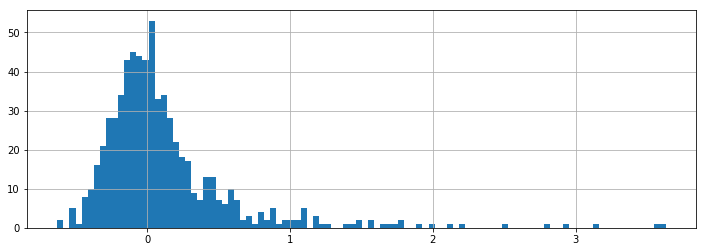

In [103]:
R.diff_ptg.hist(bins=100)